<a href="https://colab.research.google.com/github/fandrianarisataGithub/Data-science-projet-INSI-Malaria-CNN/blob/main/Memo_dsc_malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all of basic lib

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend

In [2]:
 #unzip and load dataset, once
"""from zipfile import ZipFile

with ZipFile(
    '/content/drive/MyDrive/Malaria-dataset/dataset-malaria-gr.zip',
    'r'
) as zip:
  zip.extractall('/content/drive/MyDrive/Malaria-dataset')"""

"from zipfile import ZipFile\n\nwith ZipFile(\n   '/content/drive/MyDrive/Malaria-dataset/dataset-malaria-gr.zip',\n   'r'\n) as zip:\n zip.extractall('/content/drive/MyDrive/Malaria-dataset')"

In [3]:
#check all dispo dir
os.listdir('/content/drive/MyDrive/Malaria-dataset')

['Parasitized',
 'Uninfected',
 'model_malaria_version_1_00.h5',
 'dataset-malaria-gr.zip']

In [4]:
#check Parasitized data image in index 0
print(os.listdir('/content/drive/MyDrive/Malaria-dataset/Parasitized')[0])

C68P29N_ThinF_IMG_20150819_133447_cell_130.png


In [5]:
#check Uninfected data image in index 10 and its len
print(os.listdir('/content/drive/MyDrive/Malaria-dataset/Uninfected')[10])

C62P23N_ThinF_IMG_20150818_132918_cell_146.png


In [6]:
#source of grouped data image
parasitezedData = os.listdir('/content/drive/MyDrive/Malaria-dataset/Parasitized')
unParasitezedData = os.listdir('/content/drive/MyDrive/Malaria-dataset/Uninfected')

In [7]:
#function to get image length inside a directory :
def count_image_files(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    image_count = 0

    for filename in os.listdir(directory):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

    return image_count



In [8]:
#get length of parasitized image
length_parasitized = count_image_files('/content/drive/MyDrive/Malaria-dataset/Parasitized')
length_parasitized

13779

In [9]:
#get length of uninfected image
length_Uninfected = count_image_files('/content/drive/MyDrive/Malaria-dataset/Uninfected')
length_Uninfected

13779

In [10]:
#total images
total_image = length_parasitized + length_Uninfected
total_image

27558

In [11]:
#Combine all the images in one variable and simultaneously resize all image to  50, 50

dataArrayImage = []
labels = []

for img in parasitezedData:
  try:
    imgRead = plt.imread('/content/drive/MyDrive/Malaria-dataset/Parasitized/' + img)
    imgResize = cv2.resize(imgRead, (50, 50))
    imgArray = img_to_array(imgResize)
    dataArrayImage.append(imgArray)
    labels.append(1)
  except:
    None

for img in unParasitezedData:
  try:
    imgRead = plt.imread('/content/drive/MyDrive/Malaria-dataset/Uninfected/' + img)
    imgResize = cv2.resize(imgRead, (50, 50))
    imgArray = img_to_array(imgResize)
    dataArrayImage.append(imgArray)
    labels.append(1)
  except:
    None

In [12]:
# load array as np array for all task
imageData = np.array(dataArrayImage)
labels = np.array(labels)
#test
print("imageData:",len(imageData))
print("labels:",len(labels))


imageData: 27557
labels: 27557


3 Parasitized :



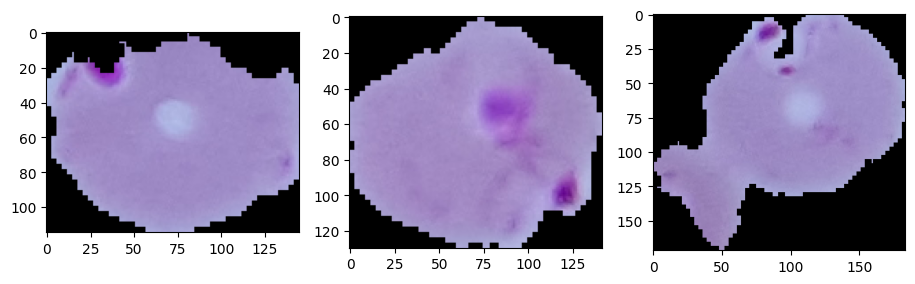

3 Uninfected:



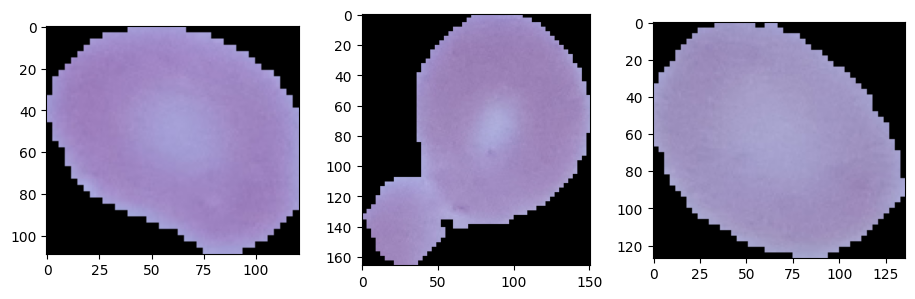

In [13]:
#data viz
print("3 Parasitized :\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/Malaria-dataset/Parasitized/'+ parasitezedData[i])
    plt.imshow(img)
plt.show()

print("3 Uninfected:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/Malaria-dataset/Uninfected/'+ unParasitezedData[i])
    plt.imshow(img)
plt.show()

In [14]:
#prepa train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imageData, labels, test_size = 0.2,random_state = 0)

y_train = utils.to_categorical(y_train, num_classes = 2)
y_test = utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 22045
X_test: 5512
y_train: 22045
y_test: 5512


In [15]:
#Use the CNN model

model = Sequential()

inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
  inputShape = (3, 50, 50)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0

In [16]:
#Compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
#model fitting
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
689/689 [==============================] - 67s 93ms/step - loss: 0.1099 - accuracy: 0.9596
Epoch 2/30
689/689 [==============================] - 65s 94ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 3/30
689/689 [==============================] - 63s 92ms/step - loss: 3.7595e-04 - accuracy: 1.0000
Epoch 4/30
689/689 [==============================] - 64s 93ms/step - loss: 2.5970e-04 - accuracy: 1.0000
Epoch 5/30
689/689 [==============================] - 64s 93ms/step - loss: 1.2404e-04 - accuracy: 1.0000
Epoch 6/30
689/689 [==============================] - 63s 91ms/step - loss: 8.7455e-05 - accuracy: 1.0000
Epoch 7/30
689/689 [==============================] - 64s 93ms/step - loss: 5.8555e-05 - accuracy: 1.0000
Epoch 8/30
689/689 [==============================] - 64s 93ms/step - loss: 2.1826e-05 - accuracy: 1.0000
Epoch 9/30
689/689 [==============================] - 63s 91ms/step - loss: 9.3471e-06 - accuracy: 1.0000
Epoch 10/30
689/689 [==============================] -

In [18]:
#evaluation

predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 4s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss:  0.0
Accuracy:  100.0


In [19]:
#Saving model
%cd "/content/drive/MyDrive/Malaria-dataset"
model.save('model_malaria_version_1_00.h5')
from tensorflow.keras.models import load_model
model = load_model('model_malaria_version_1_00.h5')
model.summary()

/content/drive/MyDrive/Malaria-dataset


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0